In [1]:
%gui qt
from PyQt5.QtWidgets import QFileDialog
from pydicom import filereader as reader, dataelem as elem
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dir = './'
fname, ftype = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="DICOM files (*.dcm)")

In [4]:
ds = reader.dcmread(fname)
img = ds.pixel_array

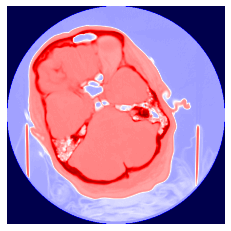

In [5]:
fig = plt.figure()
fig.patch.set_visible(False)
fig.add_subplot(111)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.seismic)
plt.show()

In [6]:
ds.PixelData = 'Image above'
output = []
for raw_value in ds.values():
    value = elem.DataElement_from_raw(raw_value) if isinstance(raw_value,elem.RawDataElement) else raw_value
    tags = str(value)
    tags = tags[tags.find('(')+1 : tags.find(')')]
    output.append((value.name, value.value, tags))
df = pd.DataFrame(output, columns=['Name', 'Value', 'Tags'])

In [7]:
df

,Name,Value,Tags
0,SOP Instance UID,ID_000012eaf,"0008, 0018"
1,Modality,CT,"0008, 0060"
2,Patient ID,ID_f15c0eee,"0010, 0020"
3,Study Instance UID,ID_30ea2b02d4,"0020, 000d"
4,Series Instance UID,ID_0ab5820b2a,"0020, 000e"
5,Study ID,,"0020, 0010"
6,Image Position (Patient),"[-125.000000, -115.897980, 77.970825]","0020, 0032"
7,Image Orientation (Patient),"[1.000000, 0.000000, 0.000000, 0.000000, 0.927...","0020, 0037"
8,Samples per Pixel,1,"0028, 0002"
9,Photometric Interpretation,MONOCHROME2,"0028, 0004"
